# FinalSubmission

### Team Members:
- Gaurang Deka
- Daniel Jea
- Jiaen Ma
- Arnav Shah


### Central Motivation

A Pokemon's type defines its identity, strengths, weaknesses, and role in battle. These types are not just arbitrary labels; they often correspond to  combat archetypes. For instance, Rock-types are frequently slow, defensive walls, while Electric-types are typically fast, specialized attackers.

This project aims to test this hypothesis using machine learning. We will build a model to determine if a Pokemon's combat statistics provide a strong enough pattern to predict its types. Understanding this relationship matters for several reasons. First, it reveals whether game designers  follow consistent statistical patterns when creating different types, or if type identity is more arbitrary and theme-based. Second, from a competitive gameplay perspective, understanding which stats define each type could help players make strategic decisions about team composition and predict opponent movesets based on visible statistics.

We aim to answer two key questions:

- How accurately can a Pokemon's type be predicted using only its six core combat statistics (HP, Attack, Defense, etc.)?

- When the model makes an incorrect prediction, which Pokemon types is it most likely to confuse with one another?

## Summary of the Data Processing Pipeline

1. Data Acquisition: Retrieve data for the first 151 Pokémon from the public PokéAPI using the requests library in Python.

2. Feature Extraction: For each Pokémon, extract the necessary attributes: its name, primary type (which serves as the categorical target variable), and its six numeric base combat statistics (HP, Attack, Defense, Special Attack, Special Defense, Speed).

3. Data Structuring: Aggregate the extracted data into a list of dictionaries, with each dictionary representing a single Pokémon.

4. DataFrame Creation: Convert the structured list into a Pandas DataFrame.

5. Data Cleaning and Validation: Perform initial validation on the DataFrame. The data sourced from the API,requires minimal cleaning.

## Part 2:
(2\%) Obtains, cleans, and merges all data sources involved in the project.

In [ ]:
import requests
import pandas as pd

base_url = "https://pokeapi.co/api/v2/pokemon/"

pokemon_data = []
for i in range(1, 152):
    try:
        response = requests.get(f"{base_url}{i}")
        data = response.json()
        types = data['types']
        primary_type = types[0]['type']['name']
        secondary_type = types[1]['type']['name'] if len(types) > 1 else None
        pokemon_info = {
            'name': data['name'].capitalize(),
            'type1': primary_type,
            'type2': secondary_type,
            'hp': data['stats'][0]['base_stat'],
            'attack': data['stats'][1]['base_stat'],
            'defense': data['stats'][2]['base_stat'],
            'special-attack': data['stats'][3]['base_stat'],
            'special-defense': data['stats'][4]['base_stat'],
            'speed': data['stats'][5]['base_stat']
        }
        pokemon_data.append(pokemon_info)
    except Exception as e:
        print(f"Could not fetch data for Pokémon {i}: {e}")
df = pd.DataFrame(pokemon_data)
df['type2'] = df['type2'].fillna('None')
# hardcoding values since api fails to fetch pikachu
pikachu_data = {
    'name': 'Pikachu',
    'type1': 'electric',
    'type2': 'None',
    'hp': 35,
    'attack': 55,
    'defense': 40,
    'special-attack': 50,
    'special-defense': 50,
    'speed': 90
}
df = pd.concat([df, pd.DataFrame([pikachu_data])], ignore_index=True)
#For Pikachu duplicates
df.drop_duplicates(subset=['name', 'type1'])
df.to_csv('PokemonStatistics.csv', index=False)
df.head(10)

,name,type1,type2,hp,attack,defense,special-attack,special-defense,speed
0,Bulbasaur,grass,poison,45,49,49,65,65,45
1,Ivysaur,grass,poison,60,62,63,80,80,60
2,Venusaur,grass,poison,80,82,83,100,100,80
3,Charmander,fire,None,39,52,43,60,50,65
4,Charmeleon,fire,None,58,64,58,80,65,80
5,Charizard,fire,flying,78,84,78,109,85,100
6,Squirtle,water,None,44,48,65,50,64,43
7,Wartortle,water,None,59,63,80,65,80,58
8,Blastoise,water,None,79,83,100,85,105,78
9,Caterpie,bug,None,45,30,35,20,20,45


## Part 3:
(2\%) Builds at least two visualizations (graphs/plots) from the data which help to understand or answer the questions of interest. These visualizations will be graded based on how much information they can effectively communicate to readers. Please make sure your visualization are sufficiently distinct from each other.

To explore our first key question, we need to see if different types actually have distinct statistical profiles.
After a little experimenting, I found Box plots to be a great way to visualize the distribution (median, spread, outliers) of each combat stat across the various Pokemon types.

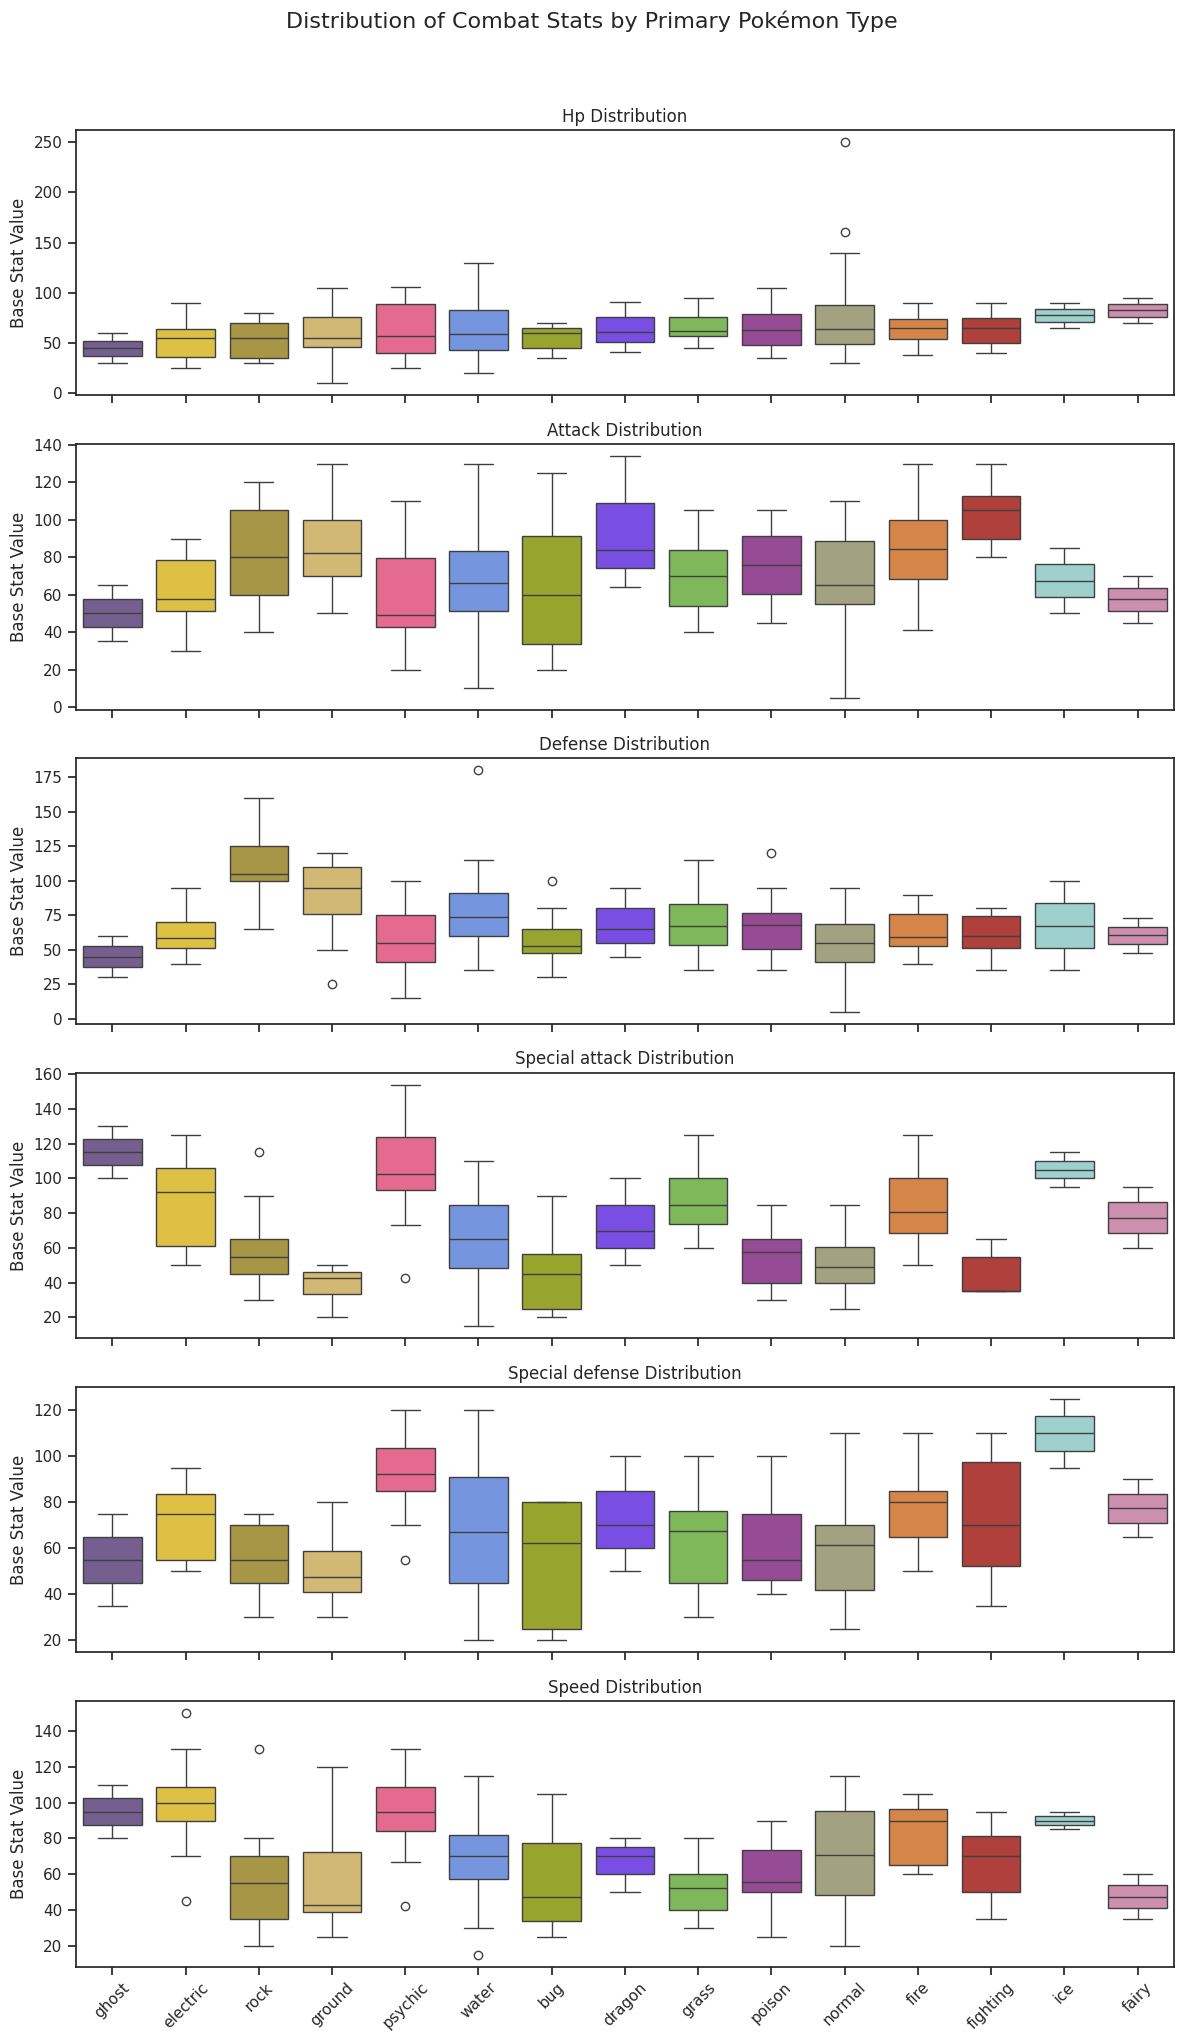

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", palette="muted")
stats_to_plot = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']

fig, axes = plt.subplots(len(stats_to_plot), 1, figsize=(12, 20), sharex=True)
fig.suptitle('Distribution of Combat Stats by Primary Pokémon Type', fontsize=16, y=1.02)

#For coloring the types
colors = {
	'normal': '#A8A77A',
	'fire': '#EE8130',
	'water': '#6390F0',
	'electric': '#F7D02C',
	'grass': '#7AC74C',
	'ice': '#96D9D6',
	'fighting': '#C22E28',
	'poison': '#A33EA1',
	'ground': '#E2BF65',
	'psychic': '#F95587',
	'bug': '#A6B91A',
	'rock': '#B6A136',
	'ghost': '#735797',
	'dragon': '#6F35FC',
	'fairy': '#D685AD',
}


for i, stat in enumerate(stats_to_plot):
    order = df.groupby('type1')[stat].median().sort_values().index

    sns.boxplot(ax=axes[i], x='type1', y=stat, data=df, order=order, hue='type1', palette=colors, legend=False)
    axes[i].set_title(f'{stat.replace("-", " ").capitalize()} Distribution')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Base Stat Value')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

While the box plots showed detailed distributions, a heatmap can give us a more concise overview of the average combat archetype for each Pokemon type. By calculating the mean for each stat within each type, we can visualize the typical stat profile and easily compare types.

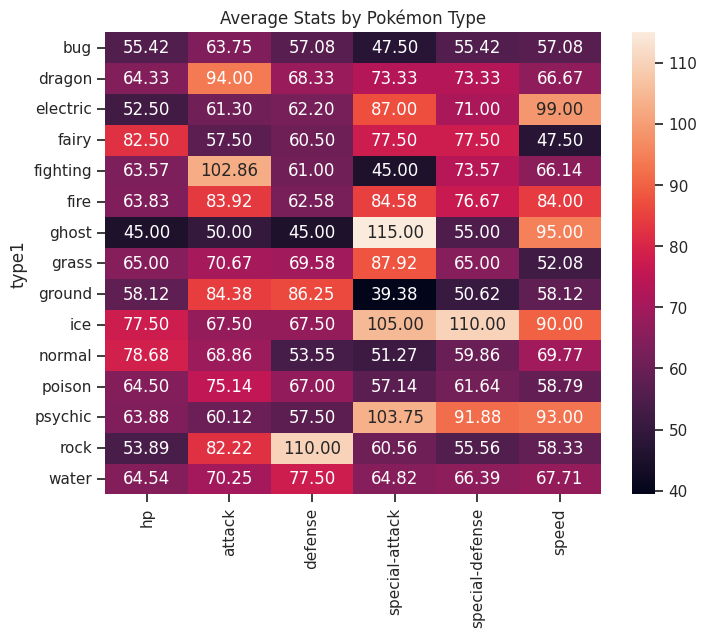

In [ ]:
#Second visual
import matplotlib.pyplot as plt
import seaborn as sns

stats_column = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']
type_stat = df.groupby('type1')[stats_column].mean()

plt.figure(figsize=(8, 6))
sns.heatmap(type_stat, annot=True, fmt='.2f')
plt.title('Average Stats by Pokémon Type')
plt.show()

# KNN Model Implementation using NumPy

### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Features
stats_columns = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']
target_column = 'type1'
secondary_target = 'type2'

# Split Raw Data
X_raw = df[stats_columns].values
y = df[target_column].values
y2 = df[secondary_target].values
names = df['name'].values

# Train test split: 70 train, 30 test
X_train_raw, X_test_raw, y_train, y_test, y2_train, y2_test, names_train, names_test = train_test_split(
    X_raw, y, y2, names, test_size=0.3, random_state=35, stratify=y
)


# 3. Normalize data
X_train = np.zeros_like(X_train_raw, dtype=float)
X_test = np.zeros_like(X_test_raw, dtype=float)

# Calculate min/max from train
min_vals = X_train_raw.min(axis=0)
max_vals = X_train_raw.max(axis=0)

# Modifcation to fix division by zero if max == min
X_train = (X_train_raw - min_vals) / (max_vals - min_vals + 1e-9)
X_test = (X_test_raw - min_vals) / (max_vals - min_vals + 1e-9)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (106, 6)
Testing Data Shape: (46, 6)


In [ ]:

# Filter out Pokemon that don't have a 2nd type
has_second_type = y2_train != 'None'
X_train_secondary = X_train[has_second_type]
y_train_secondary = y2_train[has_second_type]

# Stack Primary and Secondary data together
X_train_augmented = np.vstack((X_train, X_train_secondary))
y_train_augmented = np.concatenate((y_train, y_train_secondary))

print(f"Original Training Size: {len(X_train)}")
print(f"Augmented Training Size: {len(X_train_augmented)} (Includes Secondary Types)")

Original Training Size: 106
Augmented Training Size: 152 (Includes Secondary Types)


### KNN Algorithm (euclidean distance)

In [ ]:
def euclidean_distance(row1, row2):
    """
    Calculates the Euclidean distance (square root of sum of squared differences)
    between two data points using NumPy.

    Args:
        row1: First data point as a numpy array
        row2 : Second data point as a numpy array

    Return:
        Euclidean distance between the two points
    """
    distance = np.sqrt(np.sum((row1 - row2)**2))
    return distance

def predict_classification(X_train, y_train, test_row, k):
    """
    Predicts the class (Type) for a single test row by finding the k-nearest neighbors.

     Args:
        X_train: Training feature data
        y_train: Training target labels
        test_row: Single test data point to classify
        k: Number of nearest neighbors to consider

    Returns:
        Predicted class label for the test row
    """
    distances = []

    # Calulate distance
    for i in range(len(X_train)):
        dist = euclidean_distance(test_row, X_train[i])
        distances.append((dist, y_train[i]))

    # Sort distance
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    # Extract labels and vote
    neighbor_labels = [row[1] for row in neighbors]

    # Find the most common class label
    prediction = Counter(neighbor_labels).most_common(1)[0][0]
    return prediction

def k_nearest_neighbors_model(X_train, y_train, X_test, k=5):
    """
    Wrapper function to run predictions on the entire test set.

    Args:
        X_train: Training feature data
        y_train: Training target labels
        X_test: Test feature data to make predictions on
        k: Number of nearest neighbors to consider

    Returns:
        Array of predicted class labels for all test samples
    """
    predictions = []
    for row in X_test:
        output = predict_classification(X_train, y_train, row, k)
        predictions.append(output)
    return np.array(predictions)

### Single Guess Type Predictor

In [ ]:
k_value = 6
print(f"Running KNN Model (k={k_value})...")

y_pred = k_nearest_neighbors_model(X_train_augmented, y_train_augmented, X_test, k=k_value)

# Check if the prediction matches EITHER the Primary OR Secondary type
matches = (y_pred == y_test) | (y_pred == y2_test)
correct_predictions = np.sum(matches)

accuracy = correct_predictions / len(y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Running KNN Model (k=6)...
Model Accuracy: 30.43%


### Top 3 Guesses Type Predictor

In [ ]:
k = 10

def check_top_3_accuracy_relaxed(X_train, y_train, X_test, y_test_primary, y_test_secondary, k):
    """
    Checks the accuracy of the top 3 guesses using k-nearest neighbors.

    Parameter:
    X_train : array, training feature data (Pokémon stats)
    y_train : array, training labels (Pokémon types)
    X_test : array, test feature data (Pokémon stats)
    y_test : array, test labels (true Pokémon types)
    k : int, Number of nearest neighbors to consider

    Returns:
    float: Top-3 accuracy score
    """
    correct_top3 = 0

    for i in range(len(X_test)):
        test_row = X_test[i]
        true_prim = y_test_primary[i]
        true_sec = y_test_secondary[i]

        # Calculate distances to all training points
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(test_row, X_train[j])
            distances.append((dist, y_train[j]))

        # Get the labels of the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_neighbor_labels = [label for _, label in distances[:k]]

        # Find the 3 most common types in those neighbors
        top_3_guesses = [label for label, count in Counter(k_neighbor_labels).most_common(3)]

        # Check if EITHER correct type is in that list
        if true_prim in top_3_guesses or true_sec in top_3_guesses:
            correct_top3 += 1

    return correct_top3 / len(X_test)


top3_score = check_top_3_accuracy_relaxed(
    X_train_augmented, y_train_augmented,
    X_test, y_test, y2_test,
    k
)
print(f"Top-3 Accuracy: {top3_score * 100:.2f}%")

Top-3 Accuracy: 71.74%


### Incorrect Predictions Visualization

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter

feature_cols = ['hp', 'attack', 'defense', 'special-attack',
                'special-defense', 'speed']

X = df[feature_cols].values
y = df['type1'].values
y2 = df['type2'].values
names = df['name'].values

X_train, X_test, y_train, y_test, y2_train, y2_test, names_train, names_test = train_test_split(
    X, y, y2, names, test_size=0.3, random_state=35, stratify=y
)

has_second_type = y2_train != 'None'
X_train_secondary = X_train[has_second_type]
y_train_secondary = y2_train[has_second_type]

X_train_augmented = np.vstack((X_train, X_train_secondary))
y_train_augmented = np.concatenate((y_train, y_train_secondary))

min_vals = X_train_augmented.min(axis=0)
max_vals = X_train_augmented.max(axis=0)


X_train_norm = (X_train_augmented - min_vals) / (max_vals - min_vals + 1e-9)

X_test_norm = (X_test - min_vals) / (max_vals - min_vals + 1e-9)

def get_detailed_predictions(X_train, y_train, X_test, y_test_primary, y_test_secondary, names_test, k=10):
    """
    Generates detailed prediction results with top 3 guesses for each test sample.

    Args:
        X_train: Training feature data
        y_train: Training target labels
        X_test: Test feature data
        y_test: True labels for test data
        names_test: Names of test samples
        k: Number of nearest neighbors to consider

    Returns:
        DataFrame containing detailed prediction results for each test sample
    """
    results = []

    for i in range(len(X_test)):
        test_row = X_test[i]
        true_prim = y_test_primary[i]
        true_sec = y_test_secondary[i]
        pokemon_name = names_test[i]

        distances = []
        for j in range(len(X_train)):

            dist = np.sqrt(np.sum((test_row - X_train[j])**2))
            distances.append((dist, y_train[j]))

        distances.sort(key=lambda x: x[0])

        neighbors = [label for _, label in distances[:k]]

        vote_counts = Counter(neighbors).most_common(3)
        top_guesses = [type_label for type_label, count in vote_counts]

        while len(top_guesses) < 3:
            top_guesses.append("None")

        is_correct = (true_prim in top_guesses) or (true_sec in top_guesses)

        results.append({
            'Pokemon': pokemon_name,
            'Primary': true_prim,
            'Secondary': true_sec,
            'Guess 1': top_guesses[0],
            'Guess 2': top_guesses[1],
            'Guess 3': top_guesses[2],
            'Correct?': 'Correct!' if is_correct else 'Incorrect'
        })

    return pd.DataFrame(results)


results_df = get_detailed_predictions(
    X_train_norm,
    y_train_augmented,
    X_test_norm,
    y_test,
    y2_test,
    names_test,
    k=10
)

accuracy = len(results_df[results_df['Correct?'] == 'Correct!']) / len(results_df)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

display(results_df.head(15))

print("\nWhich types are likely to be confused by one another?")
failures = results_df[results_df['Correct?'] == 'Incorrect']
display(failures.head(10))

Model Accuracy: 71.74%


,Pokemon,Primary,Secondary,Guess 1,Guess 2,Guess 3,Correct?
0,Bellsprout,grass,poison,poison,grass,fire,Correct!
1,Shellder,water,None,rock,ground,poison,Incorrect
2,Ivysaur,grass,poison,bug,poison,water,Correct!
3,Raticate,normal,None,normal,flying,poison,Correct!
4,Gengar,ghost,poison,psychic,poison,fire,Correct!
5,Jynx,ice,psychic,psychic,bug,poison,Correct!
6,Kangaskhan,normal,None,normal,flying,water,Correct!
7,Ditto,normal,None,poison,normal,flying,Correct!
8,Omastar,rock,water,grass,poison,electric,Incorrect
9,Graveler,rock,ground,ground,rock,water,Correct!



Which types are likely to be confused by one another?


,Pokemon,Primary,Secondary,Guess 1,Guess 2,Guess 3,Correct?
1,Shellder,water,None,rock,ground,poison,Incorrect
8,Omastar,rock,water,grass,poison,electric,Incorrect
11,Flareon,fire,None,poison,grass,water,Incorrect
16,Parasect,bug,grass,water,normal,ground,Incorrect
17,Slowbro,water,psychic,grass,poison,normal,Incorrect
25,Primeape,fighting,None,flying,normal,poison,Incorrect
26,Vaporeon,water,None,poison,grass,bug,Incorrect
29,Drowzee,psychic,None,water,poison,normal,Incorrect
30,Cubone,ground,None,poison,grass,water,Incorrect
32,Snorlax,normal,None,water,fighting,poison,Incorrect


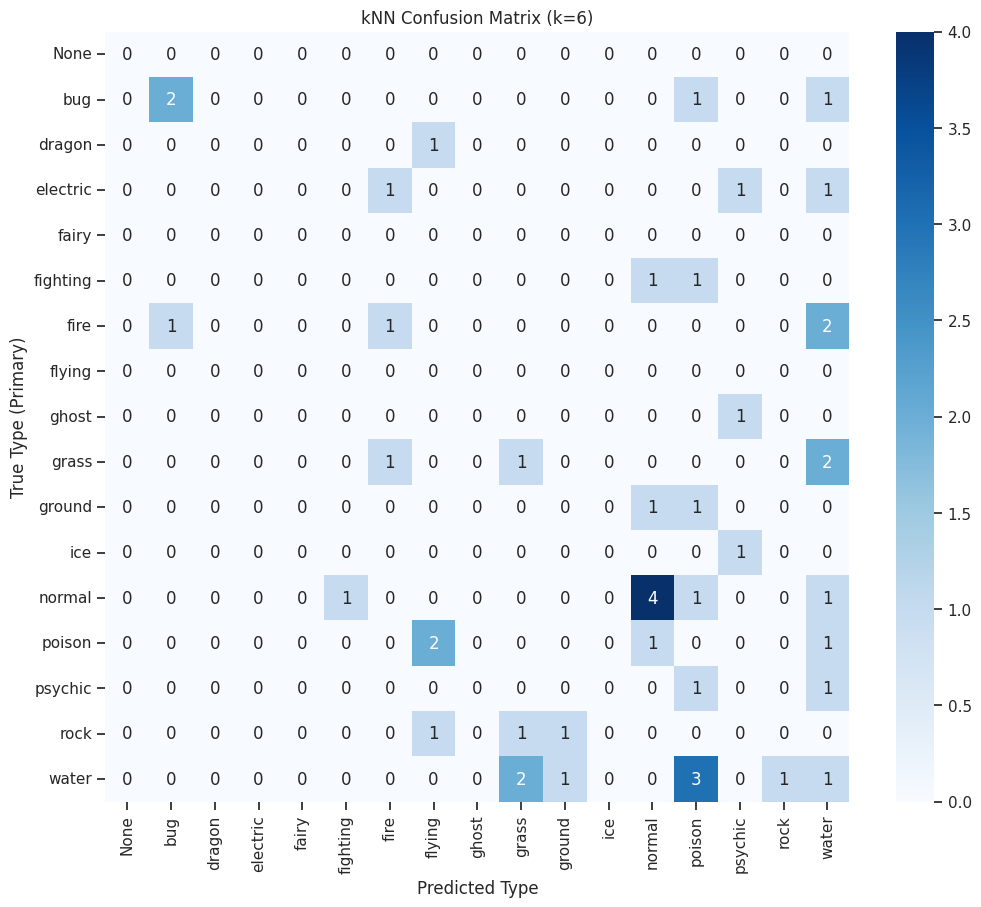

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels_for_cm = sorted(list(set(y_test) | set(y2_test) | set(y_pred)))

cm_knn = confusion_matrix(y_test, y_pred, labels=labels_for_cm)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_knn, annot=True, fmt='d', cmap='Blues',
    xticklabels=labels_for_cm,
    yticklabels=labels_for_cm
)

plt.xlabel("Predicted Type")
plt.ylabel("True Type (Primary)")
plt.title(f"kNN Confusion Matrix (k={k_value})")
plt.show()

# Random Forest Model Implementation using NumPy

### Data Preparation

In [ ]:
# Load Data
if 'df' not in locals():
    df = pd.read_csv('PokemonStatistics.csv')

# Fill None for the pokemons where type 2 does not exist
df['type2'] = df['type2'].fillna('None')

print(f"Cleaned dataset shape: {df.shape}")


# Features & Targets
stats_columns = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']
target_column = 'type1'
secondary_target = 'type2'

# Split Raw Data
X_raw = df[stats_columns].values
y = df[target_column].values
y2 = df[secondary_target].values
names = df['name'].values

# Train Test Split
X_train_raw, X_test_raw, y_train, y_test, y2_train, y2_test, names_train, names_test = train_test_split(
    X_raw, y, y2, names, test_size=0.3, random_state=35, stratify=y
)

# Normalize Data
min_vals = X_train_raw.min(axis=0)
max_vals = X_train_raw.max(axis=0)

# Avoid zero division error
X_train = (X_train_raw - min_vals) / (max_vals - min_vals + 1e-9)
X_test = (X_test_raw - min_vals) / (max_vals - min_vals + 1e-9)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Cleaned dataset shape: (152, 9)
Training Data Shape: (106, 6)
Testing Data Shape: (46, 6)


### Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Filter out Pokemon that don't have a 2nd type
has_second_type = y2_train != 'None'
X_train_secondary = X_train[has_second_type]
y_train_secondary = y2_train[has_second_type]

# Stack Primary and Secondary data together
X_train_augmented = np.vstack((X_train, X_train_secondary))
y_train_augmented = np.concatenate((y_train, y_train_secondary))

print(f"Original Training Size: {len(X_train)}")
print(f"Augmented Training Size: {len(X_train_augmented)} (Includes Secondary Types)")

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=35,
    n_jobs=-1
)
rf_model.fit(X_train_augmented, y_train_augmented)

print(f"Model trained with {rf_model.n_estimators} trees")

# 3. Predict & Evaluate
y_pred_proba = rf_model.predict_proba(X_test)
classes = rf_model.classes_

correct_count_top3 = 0
correct_count_top1 = 0
results = []

for i in range(len(X_test)):
    true_prim = y_test[i]
    true_sec = y2_test[i]

    # Get indices of the top 3 highest probabilities
    # [::-1] reverses the array so the highest probability is first
    top3_idx = np.argsort(y_pred_proba[i])[-3:][::-1]
    top3_guesses = classes[top3_idx]

    # Is the SINGLE BEST guess correct? (Matches Primary OR Secondary)
    is_correct_top1 = (true_prim == top3_guesses[0]) or (true_sec == top3_guesses[0])
    if is_correct_top1:
        correct_count_top1 += 1

    # Is ANY of the top 3 guesses correct? (Matches Primary OR Secondary)
    is_correct_top3 = (true_prim in top3_guesses) or (true_sec in top3_guesses)
    if is_correct_top3:
        correct_count_top3 += 1

    results.append({
        'Pokemon': names_test[i],
        'Primary': true_prim,
        'Secondary': true_sec,
        'Guess 1': top3_guesses[0],
        'Guess 2': top3_guesses[1],
        'Guess 3': top3_guesses[2],
        'Top-1 Result': 'Correct' if is_correct_top1 else 'Incorrect',
        'Top-3 Result': 'Correct' if is_correct_top3 else 'Incorrect'
    })

# Calculate Accuracies
accuracy_top1 = correct_count_top1 / len(X_test)
accuracy_top3 = correct_count_top3 / len(X_test)

print(f"\nModel Accuracy (Top-1): {accuracy_top1:.2%}")
print(f"Model Accuracy (Top-3): {accuracy_top3:.2%}")

# Display results
results_df = pd.DataFrame(results)
print("\nSample Predictions:")
display(results_df.head(15))

# Summary
print(f"Total Test Samples: {len(X_test)}")
print(f"Top-1 Correct: {correct_count_top1} ({accuracy_top1:.2%})")
print(f"Top-3 Correct: {correct_count_top3} ({accuracy_top3:.2%})")

Original Training Size: 106
Augmented Training Size: 152 (Includes Secondary Types)
Model trained with 300 trees

Model Accuracy (Top-1): 41.30%
Model Accuracy (Top-3): 76.09%

Sample Predictions:


,Pokemon,Primary,Secondary,Guess 1,Guess 2,Guess 3,Top-1 Result,Top-3 Result
0,Bellsprout,grass,poison,poison,grass,fire,Correct,Correct
1,Shellder,water,None,rock,ground,water,Incorrect,Correct
2,Ivysaur,grass,poison,water,poison,electric,Incorrect,Correct
3,Raticate,normal,None,normal,flying,fire,Correct,Correct
4,Gengar,ghost,poison,psychic,electric,water,Incorrect,Incorrect
5,Jynx,ice,psychic,poison,psychic,fire,Incorrect,Correct
6,Kangaskhan,normal,None,flying,normal,water,Incorrect,Correct
7,Ditto,normal,None,water,poison,dragon,Incorrect,Incorrect
8,Omastar,rock,water,grass,poison,steel,Incorrect,Incorrect
9,Graveler,rock,ground,ground,rock,water,Correct,Correct


Total Test Samples: 46
Top-1 Correct: 19 (41.30%)
Top-3 Correct: 35 (76.09%)


### Incorrect Prediction Visulization

In [ ]:
print("\nWhere did the model struggle? (Failures based on Top-1 Guess)")
failures = results_df[results_df['Top-1 Result'] == 'Incorrect']
display(failures.head(10))

print("SUMMARY\n")
print(f"Model: Random Forest")
print(f"Number of trees: {rf_model.n_estimators}")

print(f"Correct predictions (Top-1): {correct_count_top1}/{len(X_test)}")
print(f"Incorrect predictions (Top-1): {len(failures)}/{len(X_test)}")
print(f"Top-1 Accuracy: {accuracy_top1:.2%}")
print(f"Top-3 Accuracy: {accuracy_top3:.2%}")


Where did the model struggle? (Failures based on Top-1 Guess)


,Pokemon,Primary,Secondary,Guess 1,Guess 2,Guess 3,Top-1 Result,Top-3 Result
1,Shellder,water,None,rock,ground,water,Incorrect,Correct
2,Ivysaur,grass,poison,water,poison,electric,Incorrect,Correct
4,Gengar,ghost,poison,psychic,electric,water,Incorrect,Incorrect
5,Jynx,ice,psychic,poison,psychic,fire,Incorrect,Correct
6,Kangaskhan,normal,None,flying,normal,water,Incorrect,Correct
7,Ditto,normal,None,water,poison,dragon,Incorrect,Incorrect
8,Omastar,rock,water,grass,poison,steel,Incorrect,Incorrect
10,Charmeleon,fire,None,poison,water,fire,Incorrect,Correct
11,Flareon,fire,None,fighting,poison,water,Incorrect,Incorrect
14,Caterpie,bug,None,poison,bug,water,Incorrect,Correct


SUMMARY

Model: Random Forest
Number of trees: 300
Correct predictions (Top-1): 19/46
Incorrect predictions (Top-1): 27/46
Top-1 Accuracy: 41.30%
Top-3 Accuracy: 76.09%


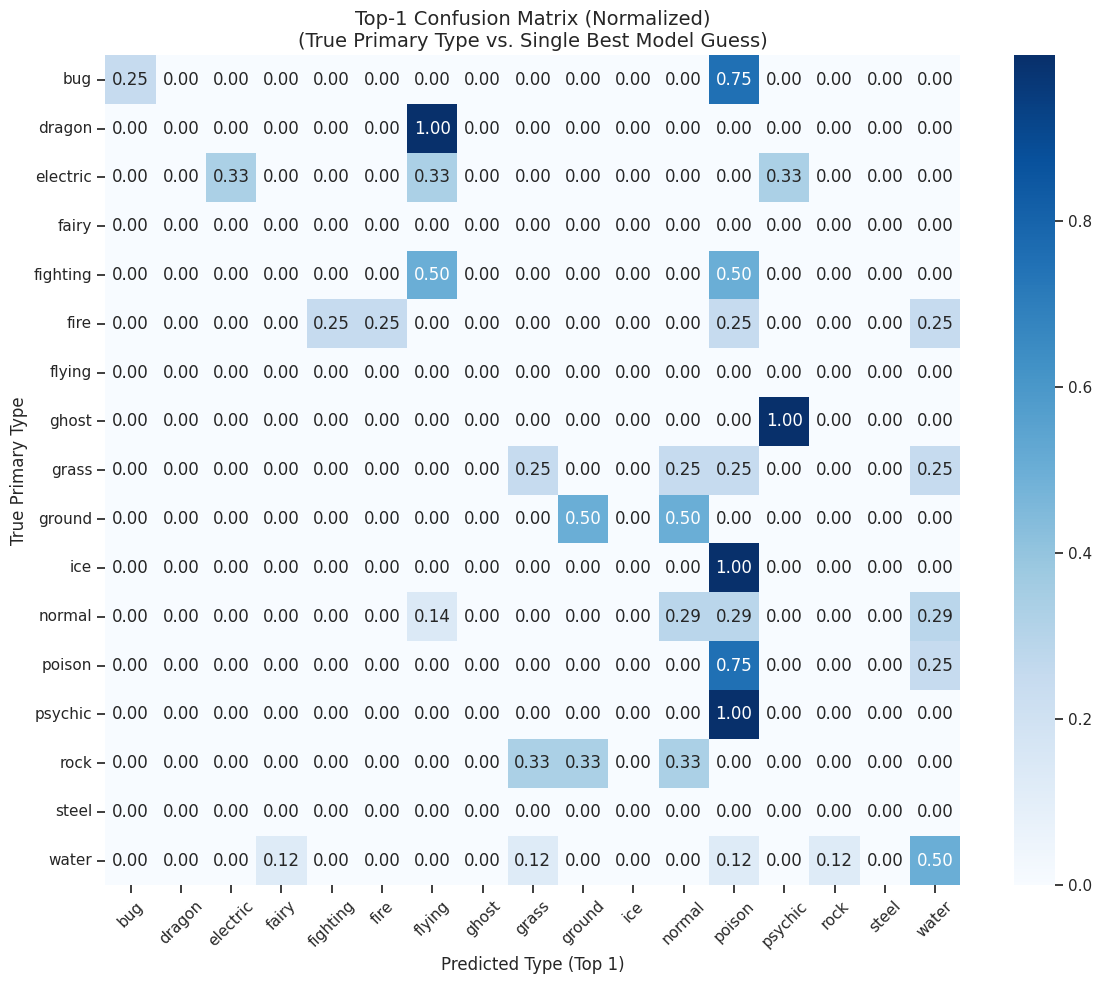

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred_top1 = rf_model.predict(X_test)
classes = rf_model.classes_

cm_top1 = confusion_matrix(y_test, y_pred_top1, labels=classes)

cm_top1_norm = cm_top1.astype('float') / (cm_top1.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_top1_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

plt.title('Top-1 Confusion Matrix (Normalized)\n(True Primary Type vs. Single Best Model Guess)', fontsize=14)
plt.ylabel('True Primary Type', fontsize=12)
plt.xlabel('Predicted Type (Top 1)', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

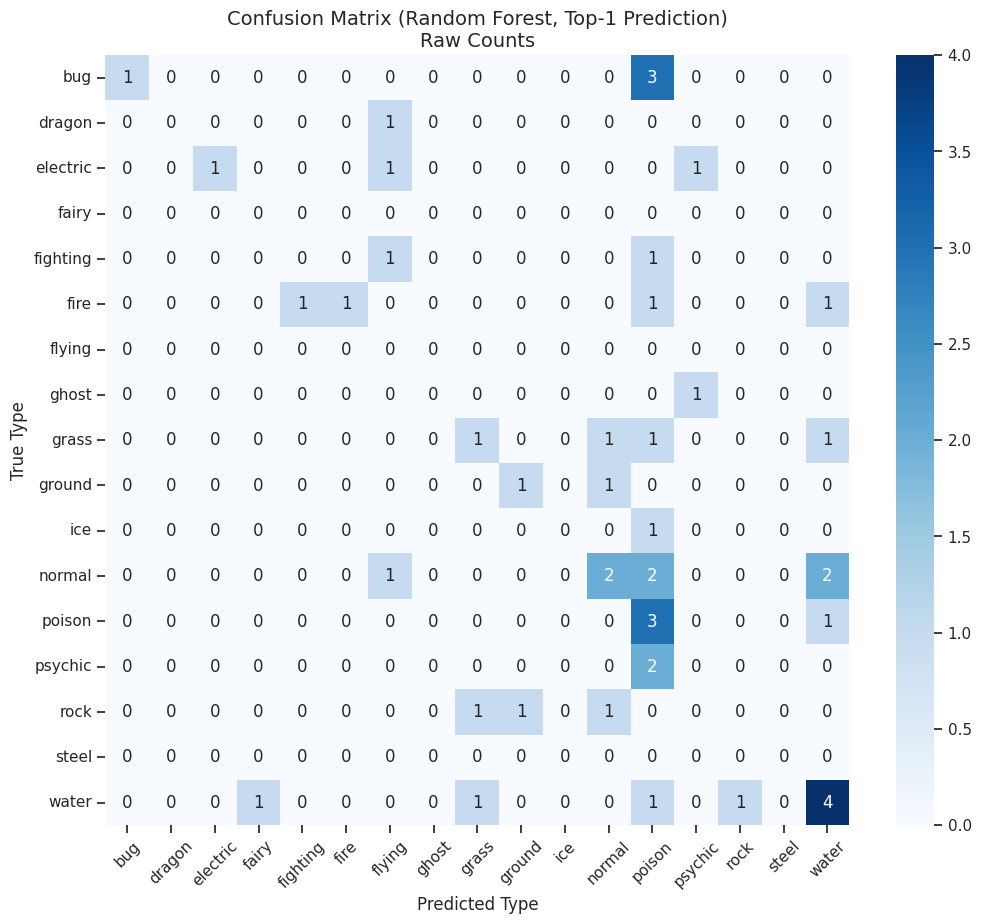

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = classes[np.argmax(y_pred_proba, axis=1)]

labels = rf_model.classes_

cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Type", fontsize=12)
plt.ylabel("True Type", fontsize=12)
plt.title("Confusion Matrix (Random Forest, Top-1 Prediction)\nRaw Counts", fontsize=14)
plt.xticks(rotation=45)
plt.show()

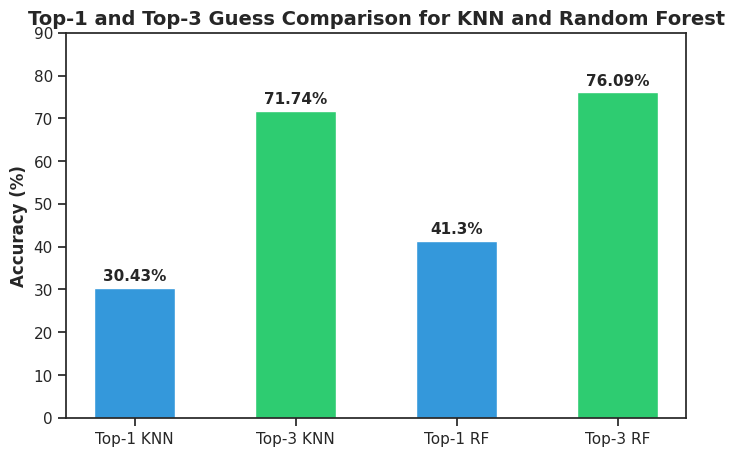

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

methods = ['Top-1 KNN', 'Top-3 KNN', 'Top-1 RF', 'Top-3 RF']
accuracies = [30.43, 71.74, 41.30, 76.09]
colors = ['#3498db', '#2ecc71', '#3498db', '#2ecc71']

bars = plt.bar(methods, accuracies, color=colors, width=0.5)

plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Top-1 and Top-3 Guess Comparison for KNN and Random Forest', fontsize=14, fontweight='bold')
plt.ylim(0, 90)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height}%',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.show()

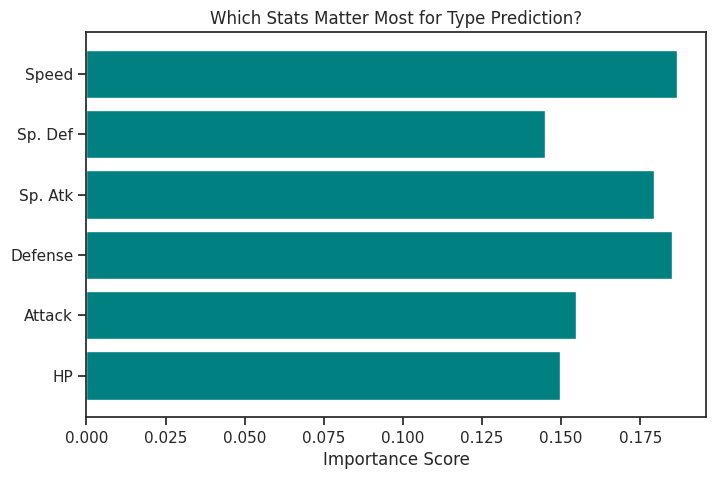

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

importances = rf_model.feature_importances_
feature_names = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='teal')
plt.title("Which Stats Matter Most for Type Prediction?")
plt.xlabel("Importance Score")
plt.show()